# Classify Age Group of Abalones
1. Load data and describe data.
2. Split data to train, test and validation dataset (in case of data snooping).
3. Train common classification model, like KNN, Decision Tree, Random Forest, SVM and find the best one.
4. Plot to show the results

# Abstract
Herein I apply most supervised classification models to the abalones dataset and predict the age as young,medium or old. I use most common classification models such as K-Nearest-Neighbor (KNN), Decision Tree, Random Forest and Support Vector Machines (SVM). My work involves applying pre-processing techniques to the data, splitting the data into training and testing data, splitting training data in validation and hyper-parameter data, applying cross validation techniques and finding the best tuning parameters for different models. Finally, I apply my best model to the testing data and get accuracy which validates my results. The best model of this data set is Random Forest.The accuracy of training dataset is 66.31%, and the accuracy of test dataset is 63.63%.

# Data Description and Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['sex','length','diameter','height','whole weight','shucked weight','viscera weight',
         'shell weight','rings']
data = pd.read_csv('abalone.data',names = column_names)
print("Total Number of samples: %d" % len(data))
data.head(5) # See samples of raw data

Total Number of samples: 4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


* statistical description

In [3]:
data.describe()

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* Data pre-processing

In [4]:
# scikit-learn takes only numbers as parameters, so firstly create a binary feature for eahc of the 3 values
for label in "MFI":
    data[label] = data["sex"] == label
del data["sex"]

# convert age to age group
for ix in data.index:
    row = data.loc[ix]
    if row.rings <= 8:
        data.loc[ix, 'rings'] = 'young'
    elif row.rings >= 11:
        data.loc[ix, 'rings'] = 'old'
    elif row.rings >=9 & row.rings <= 10:
        data.loc[ix, 'rings'] = 'medium'
        
data = data[['length','diameter','height','whole weight','shucked weight',
             'viscera weight','shell weight','M','F','I','rings']]
data.head(5)

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,M,F,I,rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,True,False,False,old
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,True,False,False,young
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,False,True,False,medium
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,True,False,False,medium
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,False,True,young


* To see if the dataset has the problem of unbalanced data

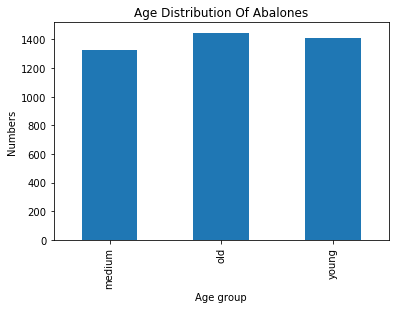

In [5]:
age_group = data.groupby('rings').rings.count()
ax = age_group.plot(kind='bar')
plt.ylabel('Numbers')
plt.xlabel('Age group')
plt.title('Age Distribution Of Abalones')
plt.show()

The plot shows that the data distributed balanced

# Split Data and Train Model

![Please put images in same directory as code to view them](Flowchart of Classification Method.png)

* Split Data

In [6]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
# first split data to available and in box
x_available,x_inbox,y_available,y_inbox = train_test_split(x,y,test_size=0.2,random_state=1)
# second spilt data to train and test from avalable dataset
x_train, x_test, y_train, y_test = train_test_split( x_available, y_available, test_size=0.2, random_state=1)

* Train Models

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [8]:
from sklearn.neighbors import KNeighborsClassifier
parameters_knn = {'n_neighbors':range(1,50)}
clf_knn = GridSearchCV(KNeighborsClassifier(),parameters_knn, cv=10)

clf_knn.fit(X=x_train,y=y_train)
knn_model = clf_knn.best_estimator_
print(clf_knn.best_score_,clf_knn.best_params_)

0.646332335329 {'n_neighbors': 20}


In [9]:
from sklearn.tree import DecisionTreeClassifier
# use cross validation to get the best max_depth of decision tree
parameters_tree = {'max_depth':range(3,20)} 
clf_tree = GridSearchCV(DecisionTreeClassifier(), parameters_tree, cv=10)

clf_tree.fit(X=x_train, y=y_train)
tree_model = clf_tree.best_estimator_
print (clf_tree.best_score_, clf_tree.best_params_)

0.622754491018 {'max_depth': 7}


In [10]:
from sklearn.ensemble import RandomForestClassifier
parameters_rf = {'n_estimators': range(10,100,10),
                 'max_features': ["sqrt"],
                 'max_depth': range(2,30,2)} 
clf_rf = GridSearchCV(RandomForestClassifier(),parameters_rf,cv=5)

clf_rf.fit(X=x_train,y=y_train)
model_rf = clf_rf.best_estimator_
print(clf_rf.best_score_,clf_rf.best_params_)

0.663173652695 {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 90}


In [11]:
from sklearn.svm import SVC
parameters_svm = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                  'C':[0.1,1,10],'gamma':[0.01,0.1,0.5,1,2]}

clf_svm = GridSearchCV(SVC(),parameters_svm,cv=5)

clf_svm.fit(X=x_train,y=y_train)
model_svm = clf_svm.best_estimator_
print(clf_svm.best_score_,clf_svm.best_params_)

0.662050898204 {'C': 10, 'gamma': 2, 'kernel': 'rbf'}


In [12]:
from prettytable import PrettyTable
models_score = PrettyTable()
models_score.add_column("Method",["KNN","Decision Tree","Random Forest","SVM"])
models_score.add_column("Accuracy",[clf_knn.best_score_,clf_tree.best_score_,clf_rf.best_score_,clf_svm.best_score_])
print(models_score)

+---------------+----------------+
|     Method    |    Accuracy    |
+---------------+----------------+
|      KNN      | 0.646332335329 |
| Decision Tree | 0.622754491018 |
| Random Forest | 0.663173652695 |
|      SVM      | 0.662050898204 |
+---------------+----------------+


# More Exlopration of Random Forest

According to the above table, it shows that Random Forest is the best model for this dataset. The following will show the final prediction accuracy of in-box data and the importance of each feature.


In [13]:
prediction = clf_rf.predict(x_inbox)
print("Prediction Accuracy (Random Forest):",metrics.accuracy_score(prediction, y_inbox))

Prediction Accuracy (Random Forest): 0.636363636364


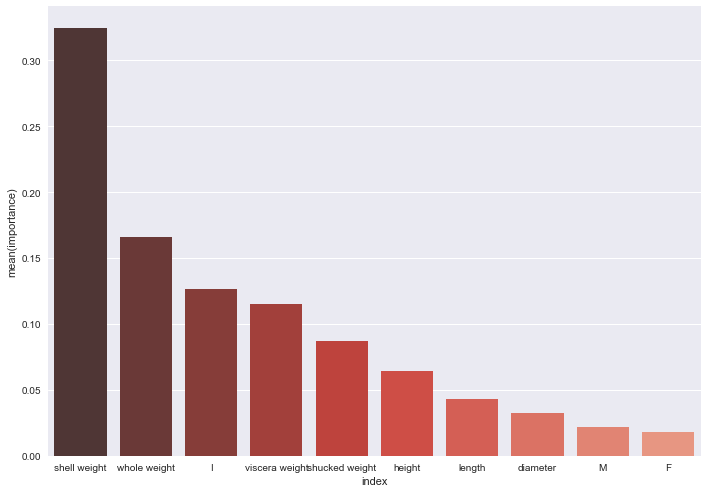

In [15]:
# More exploration of Random Forest
# Show the importance of each feature
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)
clf = RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=30)
clf.fit(x_train, y_train)

imp = pd.DataFrame(clf.feature_importances_).reset_index()
imp['index'] = data.columns.values[:-1]
imp.columns=['index','importance']
order = imp.sort_values('importance',ascending = False)['index'].values
fig = plt.subplots(figsize=(11.7, 8.27))# a4 size
sns.barplot(data=imp,x='index',y='importance',order = order,palette="Reds_d")

# Conclusion


Each methods got accuracy more than 60%. Among these four methods, Random Forest generated the most optimal results for the training set, which gave testing accuracy about 67&. The final accuray was 63.63% similar to training accuracy, indicating that there was no overfitting problem.

According to the importance of features of Random Forest, it showed that shell weight, whole weight and sex were most important features.